# 套件

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline 
sns.set()
sns.set_palette("hls", 8)
from sklearn import preprocessing, linear_model
from sklearn.svm import SVC

# 載入數據集

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
data = pd.DataFrame(iris.data,columns = iris.feature_names)
data["Type"] = iris.target
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Type
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# 資料EDA

## 鳶尾花種類個數

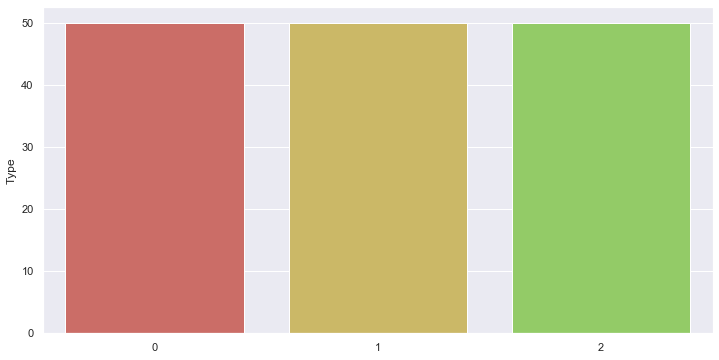

In [5]:
plt.figure(figsize=(12,6))
dtable = data.Type.value_counts() 
sns.barplot(dtable.index, dtable)

## 不同種類鳶尾花的花萼、花瓣寬度

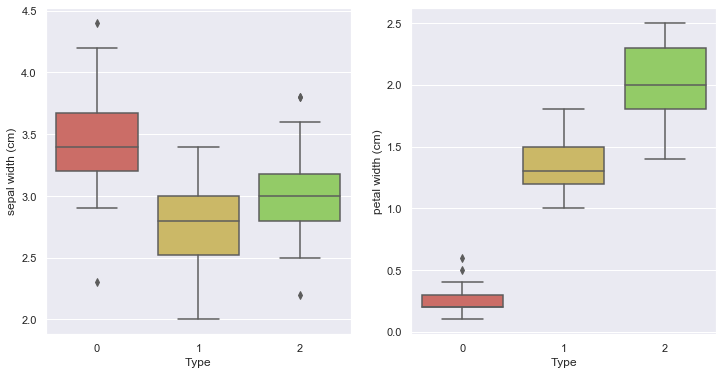

In [12]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.boxplot("Type" , "sepal width (cm)" ,data = data) 
plt.subplot(122)
sns.boxplot("Type" , "petal width (cm)" ,data = data) 

## 不同種類鳶尾花的花萼、花瓣長度

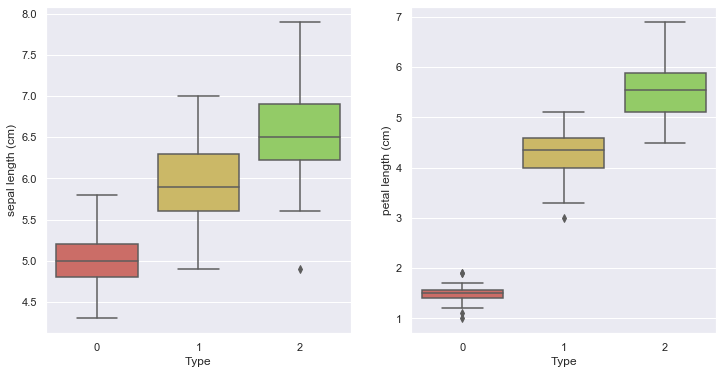

In [13]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.boxplot("Type" , "sepal length (cm)" ,data = data) 
plt.subplot(122)
sns.boxplot("Type" , "petal length (cm)" ,data = data) 

- 花萼寬度分佈與其他特徵不太類似

## 變數相關性

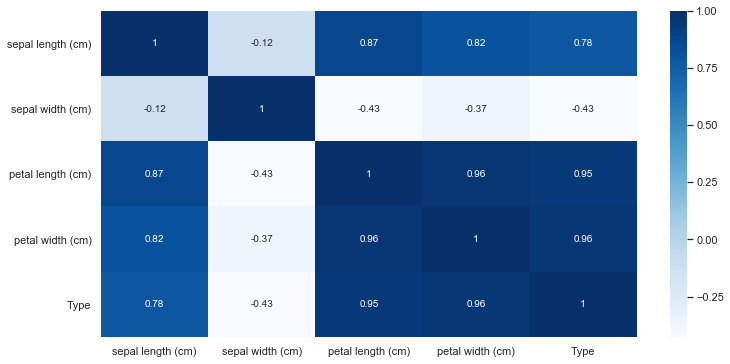

In [4]:
cor = data.corr()
plt.figure(figsize=(12,6))
sns.heatmap(cor,cmap='Blues',annot=True)

- 相關性應證花瓣寬度與其他特徵相關性低

# PCA降維

## 取相關性高的特徵做主成分分析

In [95]:
from sklearn.decomposition import PCA

In [97]:
features = ['sepal length (cm)','petal length (cm)','petal width (cm)']
pca = PCA(n_components=1)  
df2 = pca.fit_transform(data[features])
df2.shape

(150, 1)

In [99]:
explained_variance = pca.explained_variance_ratio_
num_explained_variance=np.cumsum(explained_variance)
print("新特徵解釋變異量",explained_variance)

新特徵解釋變異量 [0.95806982]


In [101]:
data['NEW']=df2
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Type,NEW
0,5.1,3.5,1.4,0.2,0,-2.655781
1,4.9,3.0,1.4,0.2,0,-2.728660
2,4.7,3.2,1.3,0.2,0,-2.887441
3,4.6,3.1,1.5,0.2,0,-2.752077
4,5.0,3.6,1.4,0.2,0,-2.692220


# SVM模型

## 訓練

In [103]:
svm = SVC(gamma = 'auto',random_state=87)
svm.fit(data.iloc[:,[1,-1]],data.iloc[:,-2])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=87, shrinking=True, tol=0.001,
    verbose=False)

## 預測結果

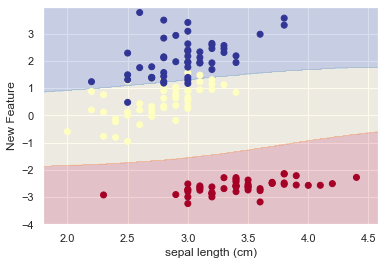

In [112]:
plt.xlabel('sepal length (cm)')
plt.ylabel('New Feature')
x = np.arange(1.8,4.6,0.02)
y = np.arange(-4,4,0.02)
X , Y = np.meshgrid(x,y)
XX = np.c_[X.ravel(),Y.ravel()]
y_predict= svm.predict(XX)
plt.contourf(X,Y,y_predict.reshape(X.shape),cmap="RdYlBu",alpha=0.2)
plt.scatter(data.iloc[:,1],(data.iloc[:,-1]),c=data.iloc[:,-2],cmap="RdYlBu")